In [ ]:
Problem:
    We are given the loan data of a bank. We are asked to analyze the loans, clients' credits 
    and their payments in order to optimize the bank's policy in giving out new loans to current or new clients.

The Data:
(We show the structure of the dataframes (read in from csv files) here. So, the code can be customized for any other files)

There are three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

With the above datasets, we are required to answer the following questions. 

Part A - Preliminary client-loan data analysis:

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [1]:
# Import the basic libraries, read in the files

import numpy as np
import pandas as pd

clients= pd.read_csv('clients.csv')
loans= pd.read_csv('loans.csv')
payments= pd.read_csv('payments.csv')


In [5]:
# Preliminary investigation of the data: clients
clients

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621
5,39505,2011-10-14,153873,610
6,32726,2006-05-01,235705,730
7,35089,2010-03-01,131176,771
8,35214,2003-08-08,95849,696
9,48177,2008-06-09,190632,769


In [2]:
# Preliminary investigation of the data

loans

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [3]:
# Investigate the data

payments

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1
...,...,...,...,...
3451,11434,428,2010-06-07,1
3452,11434,496,2010-07-23,0
3453,11434,600,2010-09-07,1
3454,11434,468,2010-10-01,0


In [2]:
# First put the client ids in an array

client_ids = loans.client_id.unique()
# client_ids = clients.client_id  # We may instead use this line
client_ids
   

array([46109, 49545, 41480, 46180, 25707, 39505, 32726, 35089, 35214,
       48177, 26326, 42320, 32961, 29841, 44601, 32885, 49068, 44387,
       39384, 26695, 38537, 46958, 41472, 49624, 26945])

In [56]:
# Problem 1.1 Give the 5 client IDs with the highest mean payment amount

# pandas dataframe methods are available on 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

mean_pays = []
for c in client_ids:
    client_loans = loans[loans.client_id.eq(c)]   # define all the loands of each client
    loan_ids = np.array(client_loans.loan_id)
    client_payments = np.array(payments[payments.loan_id.isin(loan_ids)].payment_amount) # define all the payments of each client
    mean_pays.append(client_payments.mean())

client_mean_pays = list(zip(client_ids,mean_pays)) # make a dataframe of clients and their mean payments
client_mean_pays = pd.DataFrame(np.array(client_mean_pays),
                   columns=['Client-ID', 'Mean Loan Payment'])

# Sort and show the top payers in terms of mean payment value
client_mean_pays = client_mean_pays.sort_values(by='Mean Loan Payment', ascending = False)
print("Clients' payments list (in descending order):")
client_mean_pays.iloc[:5,:]   # Here we need to show the top n, so we may use .head(n) method too


Clients' payments list (in descending order):


,Client ID,Mean Loan Payment
1,49545.0,1481.188482
13,29841.0,1439.433333
23,49624.0,1419.099010
15,32885.0,1396.495652
0,46109.0,1375.560284


In [107]:
# Problem 1.2 How many unique loans have been given out to clients who joined prior to 2001?

# a good guide about loc and iloc:  
# https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/
# Info. to work with time: serach for python strptime          and 
#  https://www.interviewqs.com/ddi_code_snippets/select_pandas_dataframe_rows_between_two_dates

# First let's remove all clients who have joined befor 2001
clients['joined'] = pd.to_datetime(clients['joined']) 
mask = clients['joined'] < '2001-01-01' 
clients_old = clients.loc[mask]
# clients_old  # To check out the result
clients_old_id = np.array(clients_old.client_id)

loans_old_unique = loans[loans.client_id.isin(clients_old_id)]
print(f'The number of unique loans given out to the customers who have been joined the bank before 2001 is: {len(loans_old_unique)}, the detail is \nas follows.')
loans_old_unique

The number of unique loans paid to the customers who have been joined the bank before 2001 is: 49, the detail is 
as follows.


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
212,42320,home,8090,0,10156,2012-09-22,2015-04-17,3.18
213,42320,cash,13643,1,10728,2002-08-04,2004-05-10,1.30
214,42320,home,5784,1,10909,2005-06-22,2007-06-19,1.97
215,42320,cash,5974,0,11538,2006-01-19,2008-04-29,2.51
216,42320,credit,8517,1,10624,2000-12-02,2002-11-06,0.64
217,42320,cash,3241,0,11882,2001-12-13,2004-01-12,0.69
218,42320,other,8367,1,11812,2007-08-24,2009-06-16,6.74
219,42320,cash,7906,0,11733,2006-02-12,2007-09-17,3.68
220,42320,home,12090,1,11443,2010-03-07,2011-09-12,1.28
221,42320,other,9498,0,11770,2003-07-24,2006-01-23,2.26


In [7]:
# Problem 1.3 What is the mean number of payments missed by clients with a credit score of less than 700 and who 
# have missed more than 50 payments?

clients_low_credit = clients.loc[clients.credit_score < 700]
low_credit_ids = np.array(clients_low_credit.client_id)
low_credit_ids

array([46109, 41480, 46180, 25707, 39505, 35214, 26326, 42320, 29841,
       44601, 32885, 49068, 39384, 26695, 38537, 46958, 41472])

In [71]:
# First make a list of number of missed payments for each client (with credit score < 700)
missed_pays = []
for c in low_credit_ids:
    client_loans = loans[loans.client_id.eq(c)]
    loan_ids = np.array(client_loans.loan_id)
    missed_or_not = np.array(payments[payments.loan_id.isin(loan_ids)].missed)
    missed_pays.append(missed_or_not.sum()) # here sum function sums up the number of missed=1 for each client


client_missed_pays = list(zip(low_credit_ids, missed_pays)) # make an array of number of missed payments for clients
client_missed_pays = pd.DataFrame(np.array(client_missed_pays),
                   columns=['client_id', 'missed_pays_no']) # conv
client_missed_pays = client_missed_pays.sort_values(by='missed_pays_no', ascending = False)

high_miss_rates = client_missed_pays.loc[client_missed_pays.missed_pays_no > 50]
mean = high_miss_rates['missed_pays_no'].mean()

print(f"The average number of missed payments by clients' with credit scores < 700 who have missed at least 50 payments is: \n{mean}.")

print("And, the full list of clients' with credit scores < 700  with their numbers of missed payments (in descending order) is as follows:")
client_missed_pays


The average number of missed payments by clients' with credit scores < 700 who have missed at least 50 payments is: 
69.25.
And, the full list of clients' with credit scores < 700  with their numbers of missed payments (in descending order) is as follows:


,client_id,missed_pays_no
3,25707,85
5,35214,85
8,29841,79
12,39384,75
11,49068,73
9,44601,72
4,39505,72
6,26326,70
0,46109,68
1,41480,68



Part B - Visualization:

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

According to the below diagram majority of payment amounts are in the range of about 200 to 1,800 dollars.

Each bar represents a $100 interval, and as is shown the frequencies in intervals > $2,600 are few to 20



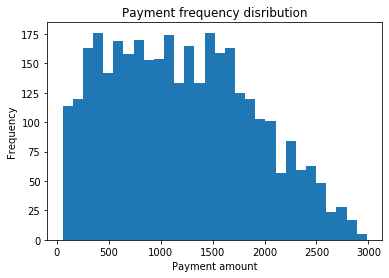

In [3]:
# Problem 2.1 Create a histogram of the payment amounts. Briefly describe the distribution.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print('According to the below diagram majority of payment amounts are in the range of about 200 to 1,800 dollars.')
print('\nEach bar represents a $100 interval, and as is shown the frequencies in intervals > $2,600 are few to 20')
print('')
plt.hist(payments.payment_amount, density=False, bins=30)  # `density=True` would show count/total count
plt.ylabel('Frequency');
plt.xlabel('Payment amount');
plt.title('Payment frequency disribution');



In [39]:
# Problem 2.2 Produce a line plot of the cumulative sum of the number of clients by year.

import datetime

clients['year_joined'] = pd.DatetimeIndex(clients['joined']).year
year_count = clients.groupby(['year_joined']).count()
year_count = year_count['joined']
year_count = year_count.cumsum()
year_count

year_joined
2000     3
2001     5
2002     9
2003    10
2004    14
2006    16
2007    17
2008    18
2009    20
2010    21
2011    23
2012    24
2013    25
Name: joined, dtype: int64

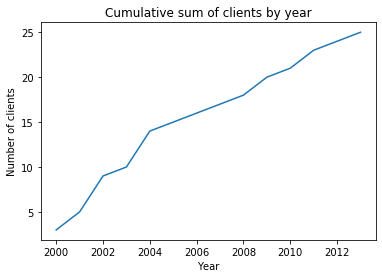

In [138]:
year_count.plot.line()
plt.ylabel('Number of clients');
plt.xlabel('Year');
plt.title('Cumulative sum of clients by year');


In [20]:
# 2.3 Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

# First we need to add the year and month column and then filter the data for month=12.
payments['payment_year'] = pd.DatetimeIndex(payments['payment_date']).year
payments['payment_month'] = pd.DatetimeIndex(payments['payment_date']).month

december_payments = payments[payments.payment_month == 12]
december_payments = december_payments.filter(['payment_year', 'missed'])

december_misses = december_payments.groupby(["payment_year"], as_index=False)["missed"].mean() # Keeps the result as a dataframe
december_misses['missed'] = december_misses['missed'] * 100  # To convert it to percent

december_misses 


,payment_year,missed
0,2000,50.000000
1,2001,48.148148
2,2002,30.000000
3,2003,52.000000
4,2004,55.000000
5,2005,46.666667
6,2006,37.500000
7,2007,56.250000
8,2008,33.333333
9,2009,66.666667


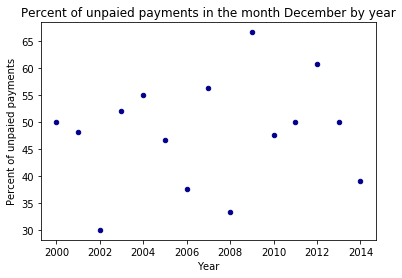

In [21]:

december_misses.plot.scatter(x='payment_year', y='missed', c = 'DarkBlue')                        
plt.ylabel('Percent of unpaied payments');
plt.xlabel('Year');
plt.title('Percent of unpaied payments in the month December by year');